In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind

%matplotlib inline

In [3]:
crashes = pd.read_csv('plane_crashes_data.csv')

In [33]:
selected_years = crashes.loc[lambda df: crashes['year'] >= 1980, :]
fatalities = pd.DataFrame(selected_years, columns=['fatalities'])
print(np.mean(fatalities))

totalyearlyfatalities = []

year = 1980
while year <= 2009:
    selected_year = crashes.loc[lambda df: crashes['year'] == year, :]
    fatalities = pd.DataFrame(selected_year, columns=['fatalities'])
    x = fatalities.sum()
    totalyearlyfatalities.append(x)
    year += 1

np.mean(totalyearlyfatalities)



fatalities    24.932607
dtype: float64


1220.8666666666666

In [47]:
jan = crashes.loc[lambda df: crashes['month'] == 1, :]
feb = crashes.loc[lambda df: crashes['month'] == 2, :]
mar = crashes.loc[lambda df: crashes['month'] == 3, :]
apr = crashes.loc[lambda df: crashes['month'] == 4, :]
may = crashes.loc[lambda df: crashes['month'] == 5, :]
jun = crashes.loc[lambda df: crashes['month'] == 6, :]
jul = crashes.loc[lambda df: crashes['month'] == 7, :]
aug = crashes.loc[lambda df: crashes['month'] == 8, :]
sep = crashes.loc[lambda df: crashes['month'] == 9, :]
octo = crashes.loc[lambda df: crashes['month'] == 10, :]
nov = crashes.loc[lambda df: crashes['month'] == 11, :]
dec = crashes.loc[lambda df: crashes['month'] == 12, :]

fatalities = pd.DataFrame(jan, columns=['fatalities'])
print('Jan: ' + str(np.sum(fatalities)))
fatalities = pd.DataFrame(feb, columns=['fatalities'])
print('Feb: ' + str(np.sum(fatalities)))
fatalities = pd.DataFrame(mar, columns=['fatalities'])
print('Mar: ' + str(np.sum(fatalities)))
fatalities = pd.DataFrame(apr, columns=['fatalities'])
print('Apr: ' + str(np.sum(fatalities)))
fatalities = pd.DataFrame(may, columns=['fatalities'])
print('May: ' + str(np.sum(fatalities)))
fatalities = pd.DataFrame(jun, columns=['fatalities'])
print('Jun: ' + str(np.sum(fatalities)))
fatalities = pd.DataFrame(jul, columns=['fatalities'])
print('Jul: ' + str(np.sum(fatalities)))
fatalities = pd.DataFrame(aug, columns=['fatalities'])
print('Aug: ' + str(np.sum(fatalities)))
fatalities = pd.DataFrame(sep, columns=['fatalities'])
print('Sep: ' + str(np.sum(fatalities)))
fatalities = pd.DataFrame(octo, columns=['fatalities'])
print('Oct: ' + str(np.sum(fatalities)))
fatalities = pd.DataFrame(nov, columns=['fatalities'])
print('Nov: ' + str(np.sum(fatalities)))
fatalities = pd.DataFrame(dec, columns=['fatalities'])
print('Dec: ' + str(np.sum(fatalities)))


Jan: fatalities    5520
dtype: int64
Feb: fatalities    5266
dtype: int64
Mar: fatalities    6276
dtype: int64
Apr: fatalities    4274
dtype: int64
May: fatalities    4604
dtype: int64
Jun: fatalities    5100
dtype: int64
Jul: fatalities    6457
dtype: int64
Aug: fatalities    6786
dtype: int64
Sep: fatalities    7119
dtype: int64
Oct: fatalities    5099
dtype: int64
Nov: fatalities    6938
dtype: int64
Dec: fatalities    6498
dtype: int64


In [50]:
print(jan.shape[0])
print(feb.shape[0])
print(mar.shape[0])
print(apr.shape[0])
print(may.shape[0])
print(jun.shape[0])
print(jul.shape[0])
print(aug.shape[0])
print(sep.shape[0])
print(octo.shape[0])
print(nov.shape[0])
print(dec.shape[0])


255
209
251
204
181
202
234
239
228
224
230
252


In [54]:
fatal_crashes = crashes.loc[lambda df: crashes['fatalities'] >= 1, :]
print(fatal_crashes.shape[0])
print(fatal_crashes.shape[0]/crashes.shape[0])


2660
0.9819121447028424


In [89]:
passengerflights = crashes.loc[lambda df: crashes['aboard'] > 0, :]
fatalitiespercentpercrash = []
x=0
while x <= (passengerflights.shape[0]-1):
    a = passengerflights.iloc[x, 8]
    b = passengerflights.iloc[x, 7]
    percentfatalities = a / b
    fatalitiespercentpercrash.append(percentfatalities)
    x += 1

np.mean(fatalitiespercentpercrash)



0.8231319223510564

The t-test comparing the commute distance of those who stayed with the company and those who left the company resulted in t = 2.888183 and p = .004137


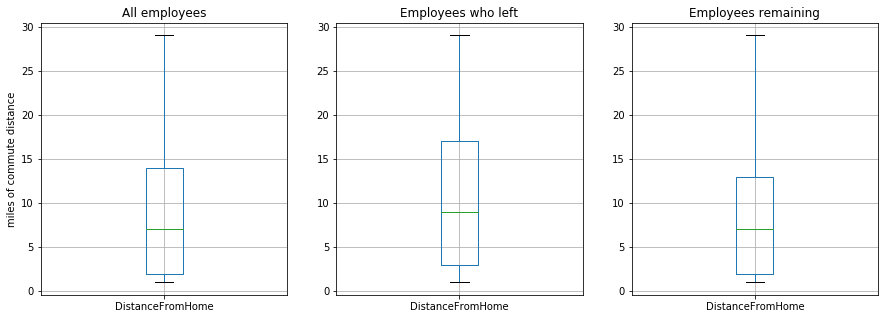

In [79]:
while x <= 2709:
    a = crashes.iloc[x, 8]
    b = crashes.iloc[x, 7]
    percentfatalities = a / b
    fatalitiespercentpercrash.append(percentfatalities)
    x += 1

fatalitiespercentpercrash

The t-test comparing the incomes of those who stayed with the company and those who left the company resulted in t = 7.482622 and p = 4.433589e-13


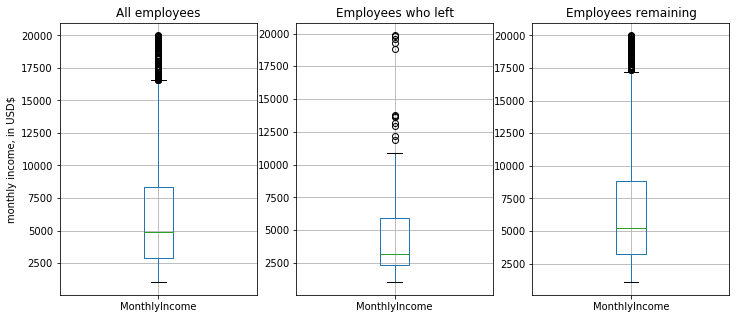

In [110]:
# comparison of leavers-vs-remainers in how much monthly income they were earning
employees_monthly = pd.DataFrame(employees.MonthlyIncome)
attrition_monthly = pd.DataFrame(attrition.MonthlyIncome)
remain_monthly = pd.DataFrame(remain.MonthlyIncome)


# box plots
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
employees_monthly.boxplot()
plt.title('All employees')
plt.ylabel('monthly income, in USD$')
plt.subplot(1, 3, 2)
attrition_monthly.boxplot()
plt.title('Employees who left')
plt.subplot(1, 3, 3)
remain_monthly.boxplot()
plt.title('Employees remaining')

# t-test
ttest_ind(remain_monthly, attrition_monthly, equal_var=False)

print('The t-test comparing the incomes of those who stayed with the company and those who left the company resulted in t = 7.482622 and p = 4.433589e-13')

# t value is non-negligible and p value is very low, 
# lending high confidence to this being a factor in attrition

The t-test comparing the lifetime years worked of those who stayed with the company and those who left the company resulted in t = 7.019178 and p = 1.159817e-11


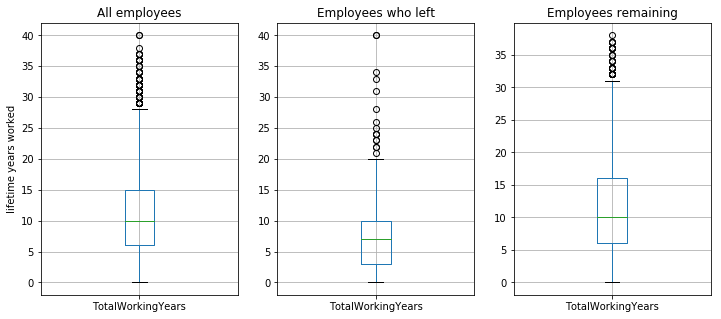

In [81]:
# comparison of leavers-vs-remainers in how long their careers had been up til the point of measurement
employees_yearsworked = pd.DataFrame(employees.TotalWorkingYears)
attrition_yearsworked = pd.DataFrame(attrition.TotalWorkingYears)
remain_yearsworked = pd.DataFrame(remain.TotalWorkingYears)
ttest_ind(remain_yearsworked, attrition_yearsworked, equal_var=False)

plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
employees_yearsworked.boxplot()
plt.title('All employees')
plt.ylabel('lifetime years worked')
plt.subplot(1, 3, 2)
attrition_yearsworked.boxplot()
plt.title('Employees who left')
plt.subplot(1, 3, 3)
remain_yearsworked.boxplot()
plt.title('Employees remaining')

print('The t-test comparing the lifetime years worked of those who stayed with the company and those who left the company resulted in t = 7.019178 and p = 1.159817e-11')

# t value is non-negligible and p value is very low, 
# lending high confidence to this being a factor in attrition

The t-test comparing the years worked at IBM of those who stayed with the company and those  who left the company resulted in t = 5.282596 and p = 2.285905e-7


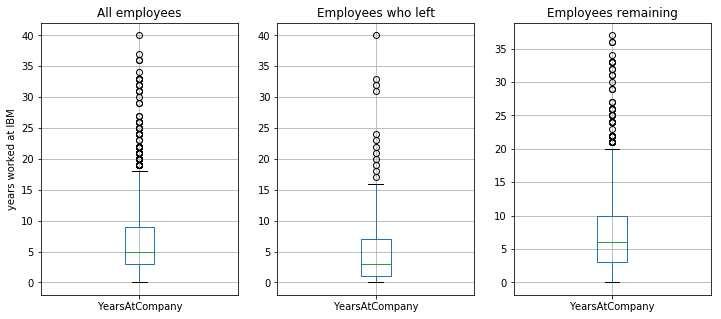

In [83]:
# comparison of leavers-vs-remainers in how long they had worked at IBM
employees_yearsatibm = pd.DataFrame(employees.YearsAtCompany)
attrition_yearsatibm = pd.DataFrame(attrition.YearsAtCompany)
remain_yearsatibm = pd.DataFrame(remain.YearsAtCompany)

ttest_ind(remain_yearsatibm, attrition_yearsatibm, equal_var=False)

plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
employees_yearsatibm.boxplot()
plt.title('All employees')
plt.ylabel('years worked at IBM')
plt.subplot(1, 3, 2)
attrition_yearsatibm.boxplot()
plt.title('Employees who left')
plt.subplot(1, 3, 3)
remain_yearsatibm.boxplot()
plt.title('Employees remaining')

print('The t-test comparing the years worked at IBM of those who stayed with the company and those  who left the company resulted in t = 5.282596 and p = 2.285905e-7')

# p value is very low, lending high confidence to this being a factor in attrition

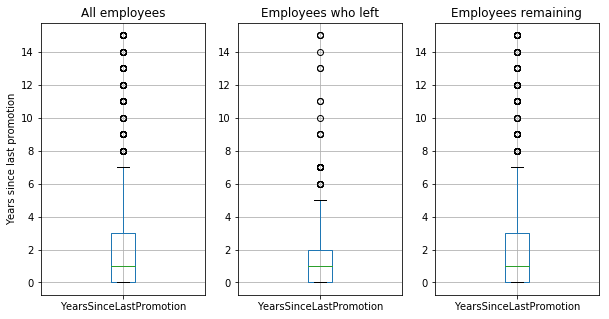

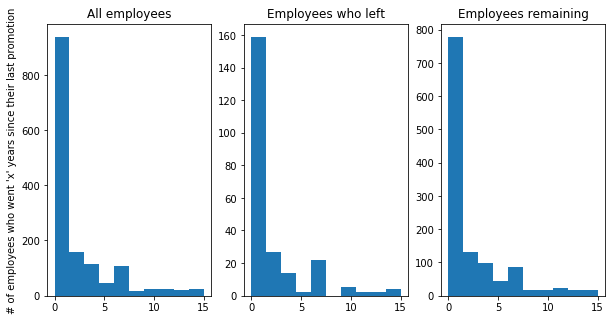

The t-test comparing the years since their last promotion of those who stayed with the company and those  who left   resulted in t = 1.287927 and p = 0.198651


In [106]:
# comparison of leavers-vs-remainers in how long it had been since their last promotion
employees_sincepromo = pd.DataFrame(employees.YearsSinceLastPromotion)
attrition_sincepromo = pd.DataFrame(attrition.YearsSinceLastPromotion)
remain_sincepromo = pd.DataFrame(remain.YearsSinceLastPromotion)

# box plots
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
employees_sincepromo.boxplot()
plt.title('All employees')
plt.ylabel('Years since last promotion')
plt.subplot(1, 3, 2)
attrition_sincepromo.boxplot()
plt.title('Employees who left')
plt.subplot(1, 3, 3)
remain_sincepromo.boxplot()
plt.title('Employees remaining')
plt.show()

# histograms
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.hist(employees['YearsSinceLastPromotion']) 
plt.title('All employees')
plt.ylabel('# of employees who went \'x\' years since their last promotion')
plt.subplot(1, 3, 2)
plt.hist(attrition['YearsSinceLastPromotion']) 
plt.title('Employees who left')
plt.subplot(1, 3, 3)
plt.hist(remain['YearsSinceLastPromotion']) 
plt.title('Employees remaining')
plt.show()

# t-test
ttest_ind(attrition_sincepromo, remain_sincepromo, equal_var=False)
print('The t-test comparing the years since their last promotion of those who stayed with the company and those  who left   resulted in t = 1.287927 and p = 0.198651')

# p is too high to put much faith in this comparison.

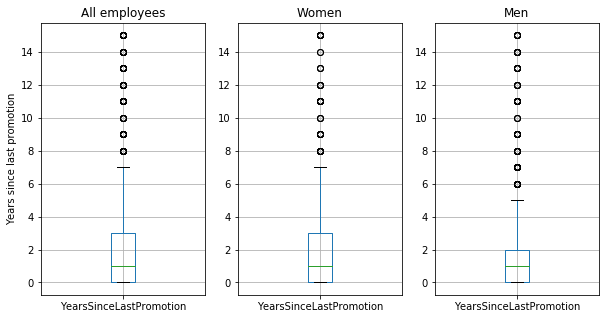

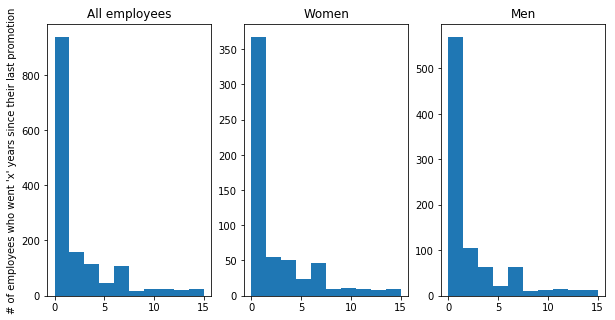

The t-test comparing the years since their last promotion of men versus women resulted in t = 1.0287927 and p = 0.303721


In [109]:
# comparison of men vs women in how many years since their last promotion
female_employees = employees.loc[lambda df: employees['Gender'] == 'Female', :]
male_employees = employees.loc[lambda df: employees['Gender'] == 'Male', :]

women_timesincepromo = pd.DataFrame(female_employees.YearsSinceLastPromotion)
men_timesincepromo = pd.DataFrame(male_employees.YearsSinceLastPromotion)

# box charts
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
employees_sincepromo.boxplot()
plt.title('All employees')
plt.ylabel('Years since last promotion')
plt.subplot(1, 3, 2)
women_timesincepromo.boxplot()
plt.title('Women')
plt.subplot(1, 3, 3)
men_timesincepromo.boxplot()
plt.title('Men')
plt.show()

# histograms
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.hist(employees['YearsSinceLastPromotion']) 
plt.title('All employees')
plt.ylabel('# of employees who went \'x\' years since their last promotion')
plt.subplot(1, 3, 2)
plt.hist(female_employees['YearsSinceLastPromotion']) 
plt.title('Women')
plt.subplot(1, 3, 3)
plt.hist(male_employees['YearsSinceLastPromotion']) 
plt.title('Men')
plt.show()

# t-test
ttest_ind(women_timesincepromo, men_timesincepromo, equal_var=False)
print('The t-test comparing the years since their last promotion of men versus women resulted in t = 1.0287927 and p = 0.303721')

# p is too high to put much faith in this comparison.